In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reads = pd.read_csv('wig_totals.csv')
reads.set_index('id', inplace=True)

In [3]:
#coact = pd.read_csv('saga_vs_tfiid.csv')
coact = []
for i in open('saga_vs_tfiid.csv'):
    coact.append(i.strip().split(','))
coact = pd.DataFrame(coact)
coact.columns = coact.iloc[0]
coact.drop(coact.index[[0]], inplace=True)
coact.set_index('Locus', inplace=True)

In [4]:
df = pd.concat([coact,reads], axis=1)

In [5]:
df.loc[df['SAGA/TFIID']=='TFIID-dominated','SAGA/TFIID'] = 1
df.loc[df['SAGA/TFIID']=='SAGA-dominated','SAGA/TFIID'] = 0

In [6]:
df = df[(df['SAGA/TFIID']==1) | (df['SAGA/TFIID']==0)]
df.dropna()

,Gene,SAGA/TFIID,area_14,reads_14,area_27,reads_27
YAL001C,TFC3,1,20106.792961,440.0,16947.691351,422.0
YAL002W,VPS8,1,11288.520779,231.0,22778.083158,664.0
YAL003W,EFB1,1,34373.578533,7354.0,35615.180573,8146.0
YAL004W,YAL004W,1,0.000000,5.0,0.000000,1.0
YAL005C,SSA1,1,33535.169423,7049.0,34959.537451,7903.0
YAL007C,ERP2,1,18219.397341,449.0,20056.008381,569.0
YAL008W,FUN14,1,6964.048616,149.0,11114.628995,227.0
YAL009W,SPO7,1,5239.059375,76.0,6709.432176,81.0
YAL010C,MDM10,1,6658.708956,97.0,7021.808368,121.0
YAL011W,SWC3,1,6893.694405,124.0,7418.934289,109.0


In [7]:
bs = pd.read_csv('gcn4_BS_num.csv')
bs = bs.ix[:,1:]
bs.columns = ['locus','# of gcn4 BS']
bs.set_index('locus', inplace=True)

In [8]:
df = pd.concat([df,bs], axis=1)

In [9]:
df.fillna(0, inplace=True)

In [10]:
tss = pd.read_csv('tss.csv')
tss = tss.ix[:,1:]
tss.set_index('id', inplace=True)

In [11]:
df = pd.concat([df,tss], axis=1)

In [12]:
df.dropna(inplace=True)

In [13]:
from notebook_library import open_sgd
sgd = open_sgd(600)

In [14]:
sgd.set_index('locus', inplace=True)

In [15]:
sgd = sgd[['start','W/C',]]
df = pd.concat([df,sgd], axis=1)

In [16]:
df.dropna(inplace=True)

In [17]:
df.loc[:,'TSS-Start_dist'] = (df.loc[:,'start'] - df.loc[:,'TSS_start']) * df.loc[:,'W/C'].astype(int)

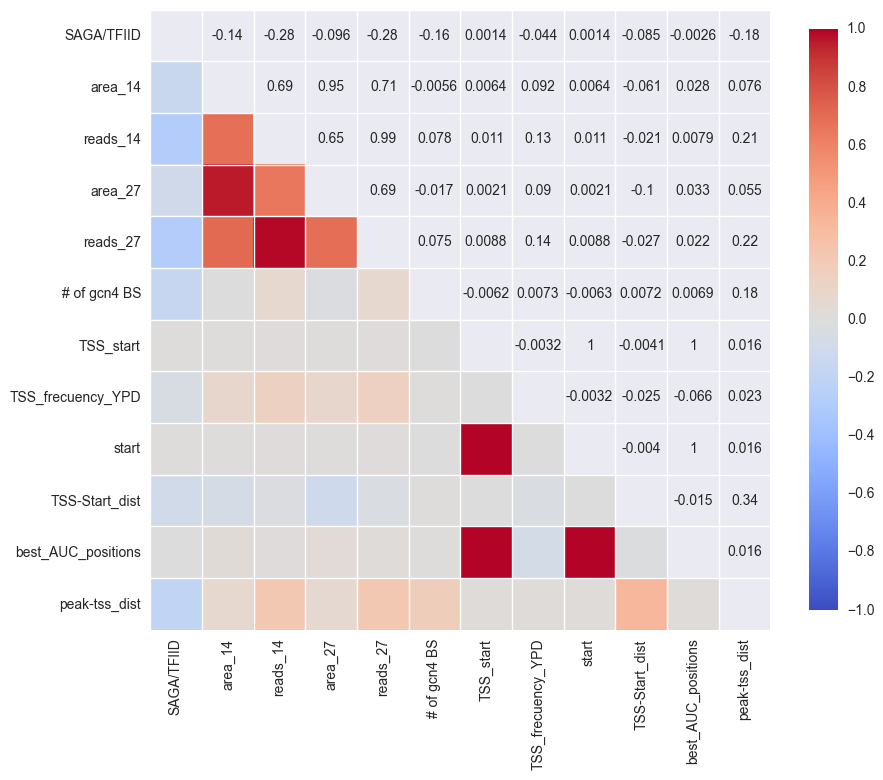

In [27]:
plt.figure(figsize=(10,10))
sns.corrplot(df, annot=True, diag_names=False)

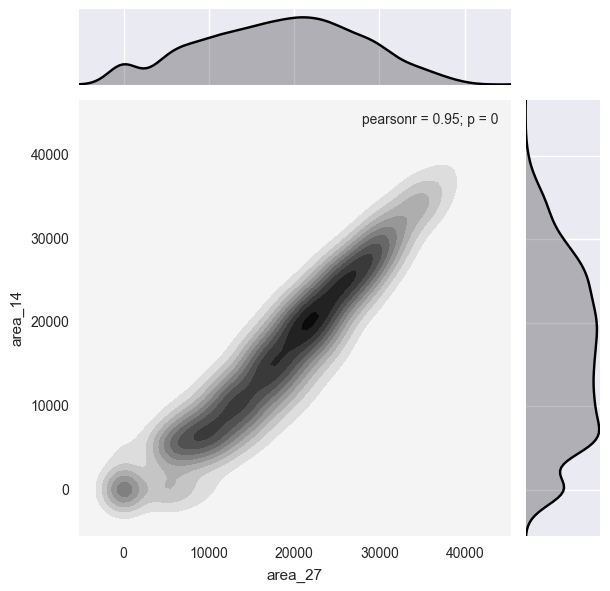

In [19]:
sns.jointplot("area_27", "area_14", df, kind="kde", color='k')


In [20]:
peak_position = pd.read_csv('wig_best_AUC_positions.csv')
peak_position = peak_position.ix[:,1:]
peak_position.set_index('id', inplace=True)

In [21]:
df = pd.concat([df,peak_position], axis=1)
df.loc[:,'peak-tss_dist'] = abs(df.loc[:,'TSS_start'] - df.loc[:,'best_AUC_positions'])

In [22]:
df2 = df.dropna()

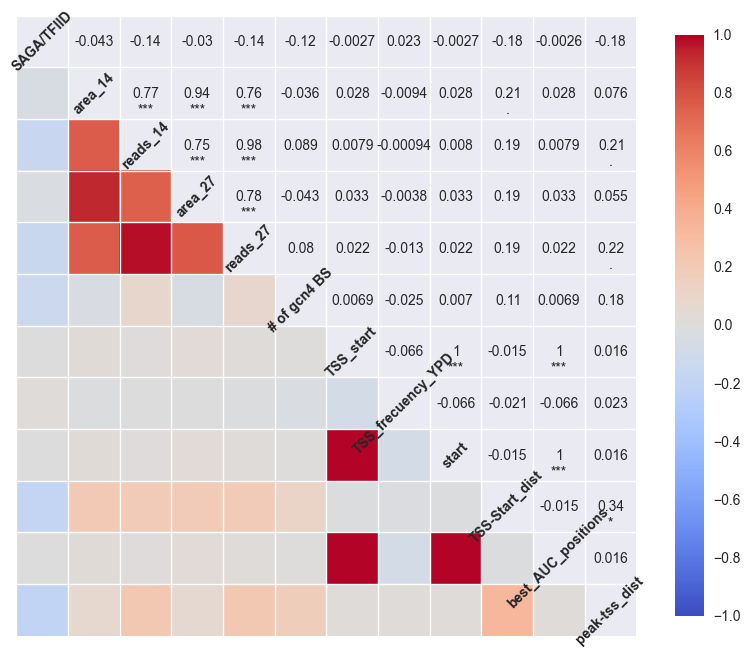

In [23]:
plt.figure(figsize=(10,10))
sns.corrplot(df2)

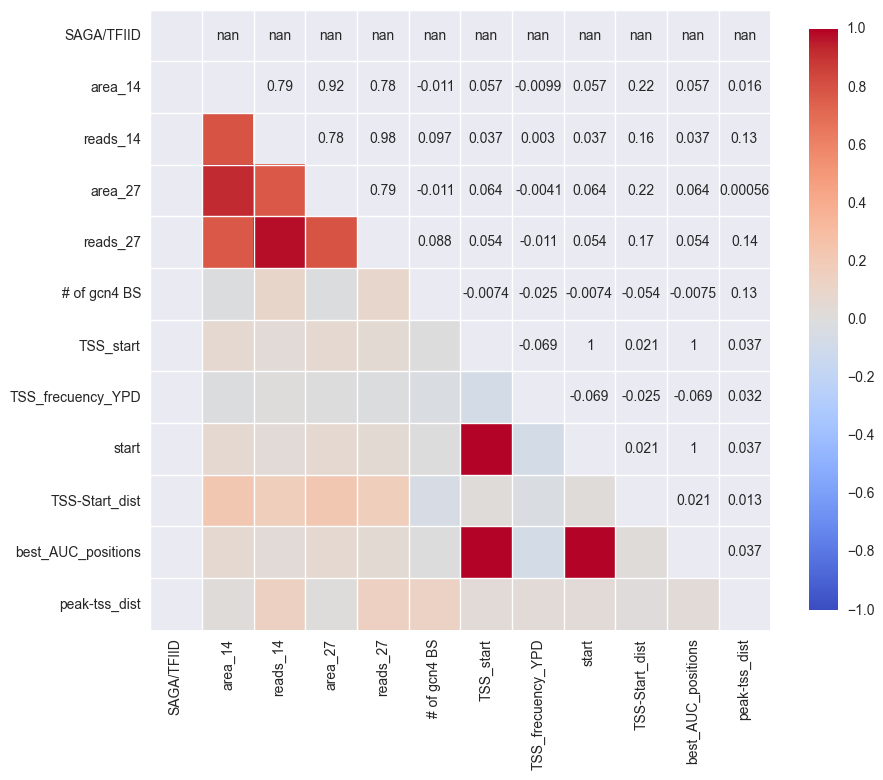

In [33]:
plt.figure(figsize=(10,10))
sns.corrplot(df2[df2['SAGA/TFIID']==1], diag_names=False)

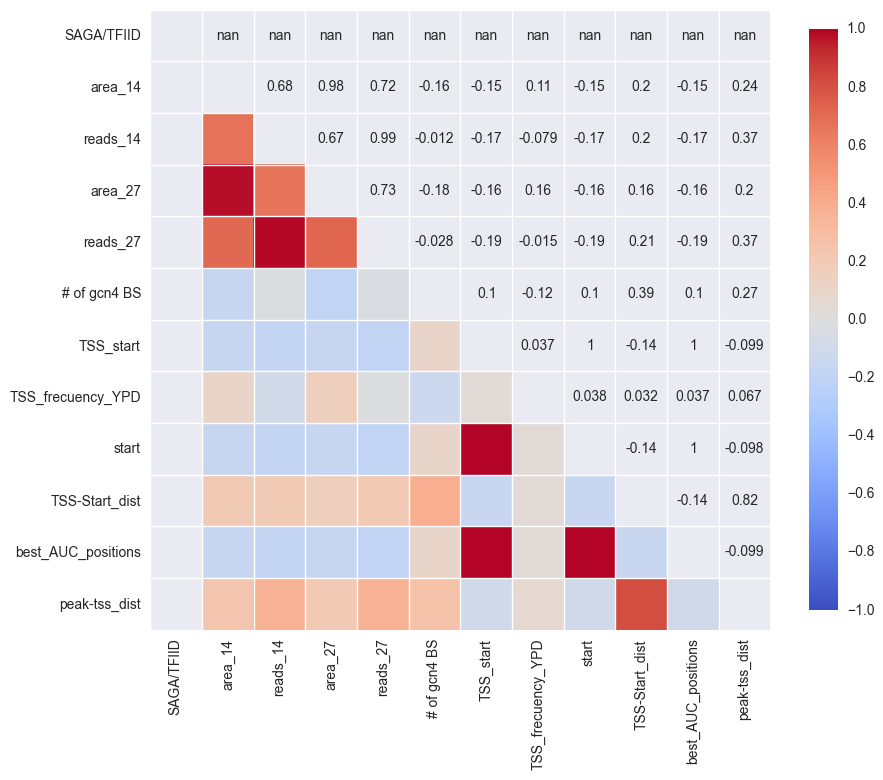

In [34]:
plt.figure(figsize=(10,10))
sns.corrplot(df2[df2['SAGA/TFIID']==0],diag_names=False)

Los reads y areas, mustran (aunque muuuuy pequenas...) correlaciones con hacia distintos lados 

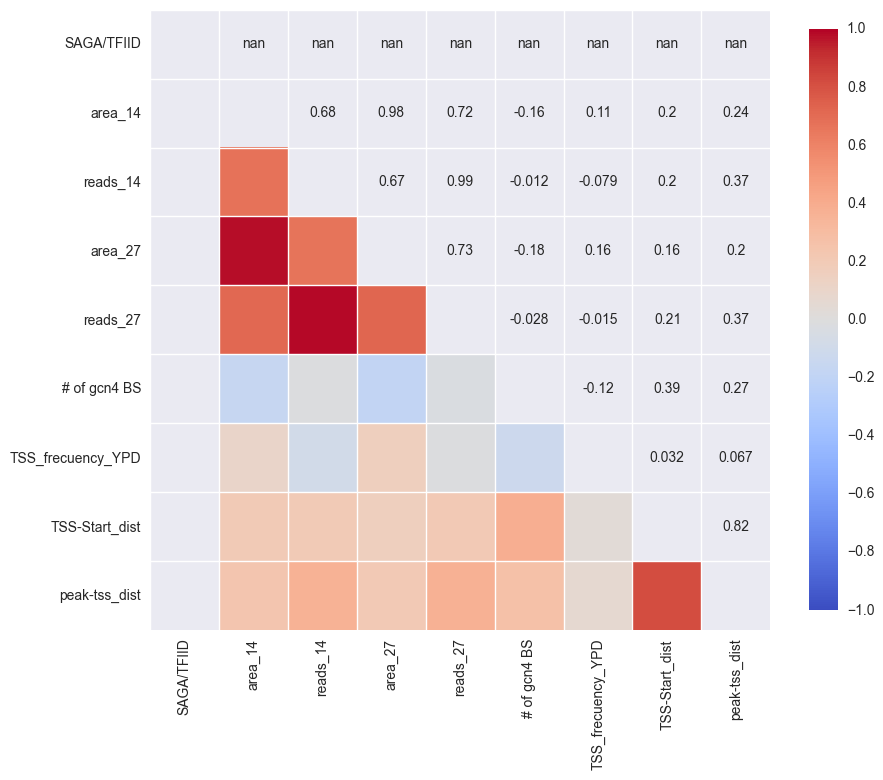

In [69]:
short = pd.concat([df2.ix[:,1:7], df2.ix[:,8], df2.ix[:,11], df2.ix[:,13]], axis=1)
plt.figure(figsize=(10,10))
sns.corrplot(short[short['SAGA/TFIID']==0], diag_names=False)

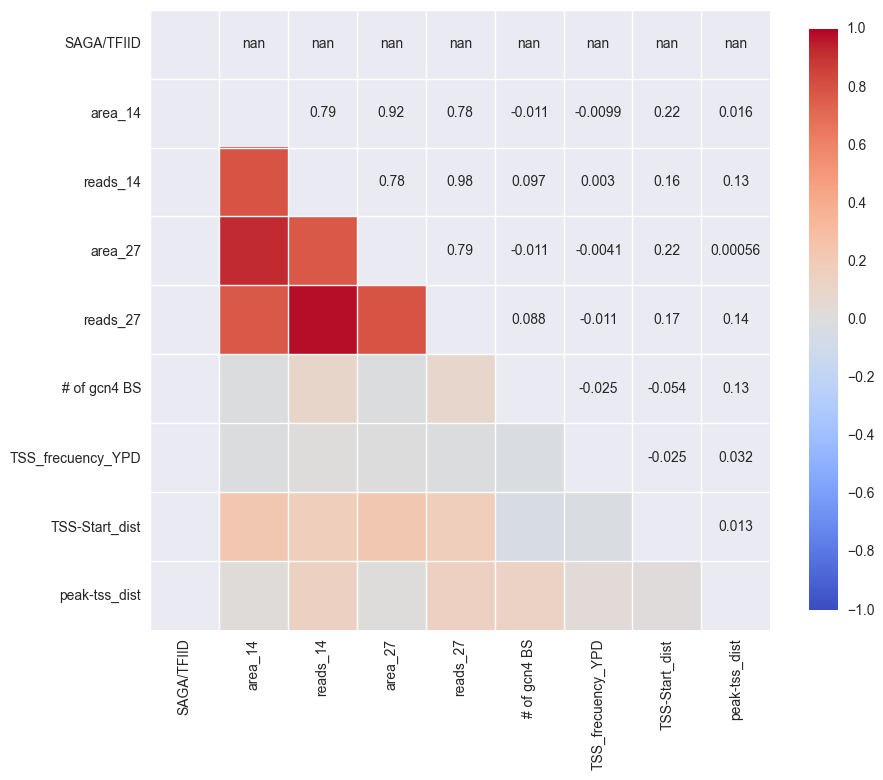

In [70]:
plt.figure(figsize=(10,10))
sns.corrplot(short[short['SAGA/TFIID']==1], diag_names=False)

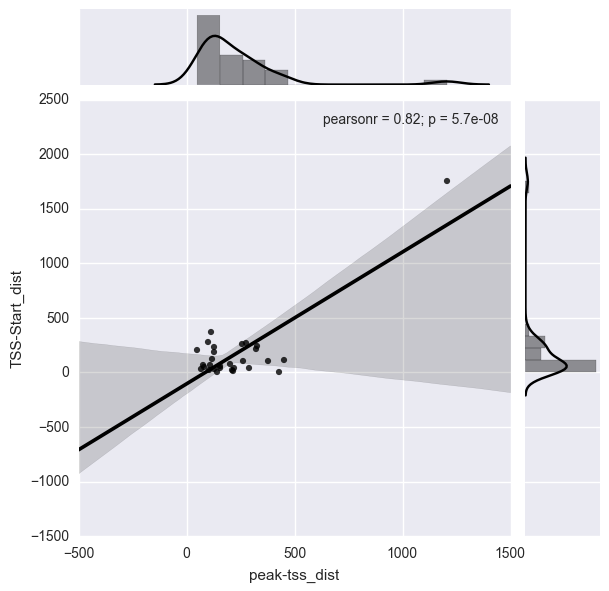

In [105]:
short.dropna()
sns.jointplot("peak-tss_dist", "TSS-Start_dist", short[short['SAGA/TFIID']==0], kind="reg", color='k')

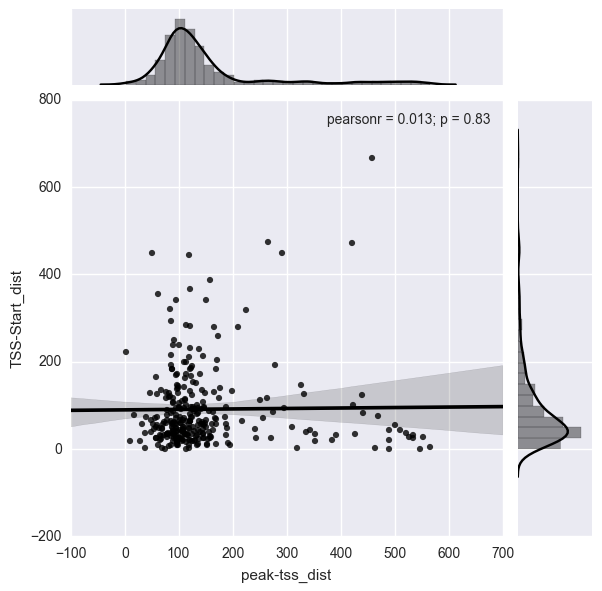

In [100]:
sns.jointplot("peak-tss_dist", "TSS-Start_dist", short[short['SAGA/TFIID']==1], kind="reg", color='k')

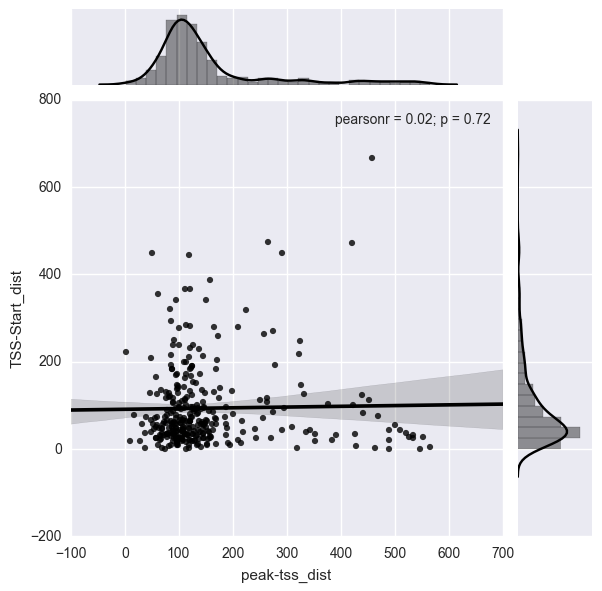

In [104]:
plt.figure(figsize=(10,10))
sns.jointplot("peak-tss_dist", "TSS-Start_dist", short[short['TSS-Start_dist']<1000], kind="reg", color='k')